## How to get a heavily connected system out of a depressed state.

In [2]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import random

In [3]:
# Import input files
weightsParam = pd.read_csv('../Data/EmpiricalWeightParameters.txt',delimiter='\t',encoding='utf-8')
thresholdParam = pd.read_csv('../Data/EmpiricalThresholdParameters.txt',delimiter=',',encoding='utf-8').set_index("var")

# Set right index
keyArr = np.array(weightsParam.keys())
weightsParam = weightsParam.set_index(keyArr)

In [3]:
normal = [0,1,10,11,12,13]
crit3 = [2,3,4,5]
crit4 = [6,7]
crit5 = [8,9]


# Checks if somebody shows enough signs to have a MD
def check_MD(X):
    count = 0
    
    for n in normal:
        if X[n] == True:
            count += 1
    
    for c in crit3:
        if X[c] == True:
            count += 1
            break
            
    for c in crit4:
        if X[c] == True:
            count += 1
            break
            
    for c in crit5:
        if X[c] == True:
            count += 1
            break
            
    return count


# Simulate the systems over I timesteps, needs to be given a threshold parameter.
def sim(b):
    
# Do not change the thousand only here, but also in the rest of the code, to keep the percentage calculated normally.
    I = 1000

    W = np.asarray(weightsParam)
    c = 2

    X = np.zeros(b.shape, np.bool)
    D = np.empty(I, np.uint8)
    no_MD = 0

    for i in range(I):
        A = np.sum(c*W*X, axis=1)
        P = 1 / (1 + np.exp(b-A))
        X = P > np.random.uniform(0, 1, P.shape)

        D[i] = np.sum(X)
        
# If on a timestep, there are less than 5 symptoms active, no MD
        if check_MD(X) < 5:
            no_MD +=1
    
    return no_MD


# Generate threshold, with a specific number of random thresholds increased.
def make_b_random(numberof):
    b = np.abs(np.asarray(thresholdParam).ravel())
    r = random.sample(range(0,14), numberof)
    
    for i in range(numberof):
        b[r[i]] = 100
    
    return b

# Generate threshold, with specific thresholds increased.
def make_b_notrandom(which):
    b = np.abs(np.asarray(thresholdParam).ravel())
    
    if isinstance(which, int):
        b[which] = 100
    else:
        for w in which:
            b[w] = 100
    
    return b

A heavily connected network goes fast from 0 to depressed and stays high in the drepressed state. It might be a solution to up the threshold for persons with a heavily connected network, since this effectively diminishes their weigth they can add to the other symptons. C won't change, since some people are just more heavily connected and it is equally difficult to change the weight two symptoms have, since they are connected and can not de deconnected (you can deconnect los of appetite and weight loss, it just not possible). So the only thing left over to deconnect is the threshold. So let's try and see which thresholds should become higher to decrease the activation. 
A symptom can be a link(like insomnia and retardation is linked by fatigue). 

## General case

In [4]:
I = 100
parameters = np.linspace(0,14,15)
averages = []

# Increase random symptom thresholds from 1 till 14 symproms.
for parameter in parameters:
    time_not_MD = []
    for i in range(I):
        B = make_b_random(int(parameter))
        time_not_MD.append(sim(B))
        
# Do not change the thousand only here, but also in the sim() function.
    averages.append(np.mean(time_not_MD) / 1000)

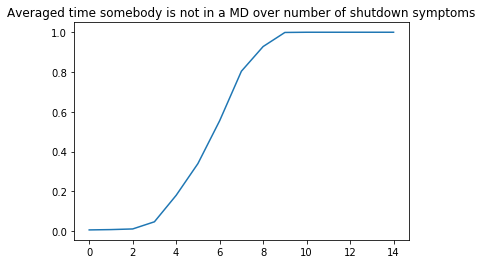

In [5]:
plt.plot(averages)

plt.title("Averaged time somebody is not in a MD over number of shutdown symptoms")
plt.show()

## Specific cases
0: dep
1: int
2: los
3: gai
4: dap
5: iap
6: iso
7: hso
8: agi
9: ret
10: fat
11: wor
12: con
13: dea

### One symptoms shut down

In [6]:
I = 10
parameters = np.linspace(0,13,14)
averages1 = []

# Increase threshold for specific parameters. 
# The effect of shutting down all symptoms one by one is shown
for parameter in parameters:
    time_not_MD = []
    for i in range(I):
        B = make_b_notrandom(int(parameter))
        time_not_MD.append(sim(B))
        
    averages1.append(np.mean(time_not_MD) / 1000)

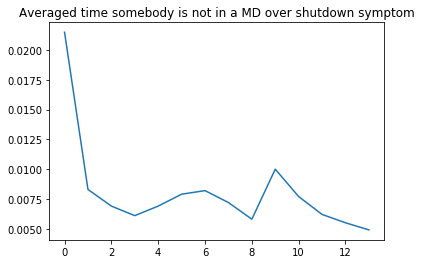

In [7]:
plt.plot(averages1)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

### Two symptoms shut down

In [8]:
I = 10
parameters = np.linspace(0,13,14)
averages2 = []
paras2 = []

for i in range(len(parameters)):
    for j in range(14 - i):
        if parameters[i] != parameters[j + i]:
            time_not_MD = []
            for k in range(I):
                B = make_b_notrandom([int(parameters[i]),int(parameters[j + i])])
                time_not_MD.append(sim(B))
                
            averages2.append(np.mean(time_not_MD) / 1000)
            paras2.append([parameters[i], parameters[j+i]])

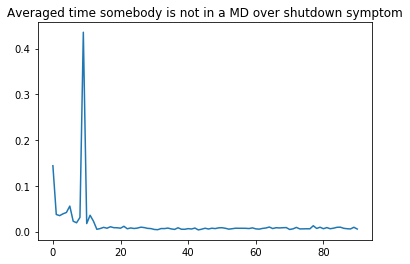

In [9]:
plt.plot(averages2)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

In [29]:
for i in range(len(averages2)):
    if averages2[i] > 0.05:
        print(averages2[i],paras2[i])

0.144 [0.0, 1.0]
0.0559 [0.0, 6.0]
0.4357 [0.0, 10.0]


### Three symptoms shut down

In [11]:
I = 10
parameters = np.linspace(0,13,14)
averages3 = []
paras3 = []

for i in range(len(parameters)):
    for j in range(14 - i):
        if parameters[i] != parameters[j + i]:
            for k in range(14-i-j):
                if parameters[j+i] != parameters[k+j+i]:
                    time_not_MD = []
                    for l in range(I):
                        B = make_b_notrandom([int(parameters[i]),int(parameters[j + i]), int(parameters[k+i+j])])
                        time_not_MD.append(sim(B))

                    averages3.append(np.mean(time_not_MD) / 1000)
                    paras3.append([parameters[i], parameters[j+i],parameters[k+i+j]])

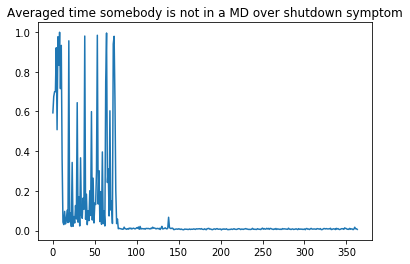

In [12]:
plt.plot(averages3)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

In [34]:
for i in range(len(averages3)):
    if averages3[i] > 0.98:
        print(averages3[i],paras3[i])

0.9984 [0.0, 1.0, 10.0]
0.9833 [0.0, 6.0, 10.0]
0.9945 [0.0, 8.0, 10.0]


### Four symptoms shut down

In [13]:
I = 10
parameters = np.linspace(0,13,14)
averages4 = []
paras4 = []

for i in range(len(parameters)):
    for j in range(14 - i):
        if parameters[i] != parameters[j + i]:
            for k in range(14-i-j):
                if parameters[j+i] != parameters[k+j+i]:
                    for l in range(14-k-j-i):
                        if parameters[k+j+i] != parameters[l+k+j+i]:
                            time_not_MD = []
                            for m in range(I):
                                B = make_b_notrandom([int(parameters[i]),int(parameters[j + i]), int(parameters[k+i+j]), int(parameters[l+k+j+i])])
                                time_not_MD.append(sim(B))

                            averages4.append(np.mean(time_not_MD) / 1000)
                            paras4.append([parameters[i], parameters[j+i],parameters[k+i+j], parameters[l+k+j+i]])

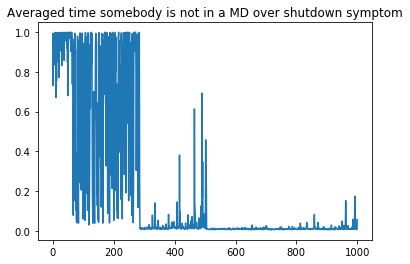

In [14]:
plt.plot(averages4)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

In [39]:
for i in range(len(averages4)):
    if averages4[i] == 1:
        print(averages4[i],paras4[i])

1.0 [0.0, 1.0, 6.0, 10.0]
1.0 [0.0, 1.0, 8.0, 10.0]
1.0 [0.0, 1.0, 10.0, 12.0]
1.0 [0.0, 3.0, 4.0, 10.0]
1.0 [0.0, 4.0, 5.0, 10.0]
1.0 [0.0, 6.0, 10.0, 11.0]


### Five symptoms shut down

In [15]:
I = 10
parameters = np.linspace(0,13,14)
averages5 = []
paras5 = []

for i in range(len(parameters)):
    for j in range(14 - i):
        if parameters[i] != parameters[j + i]:
            for k in range(14-i-j):
                if parameters[j+i] != parameters[k+j+i]:
                    for l in range(14-k-j-i):
                        if parameters[k+j+i] != parameters[l+k+j+i]:
                            for m in range(14-l-k-j-i):
                                if parameters[l+k+j+i] != parameters[m+l+k+j+i]:
                            
                                    time_not_MD = []
                                    for n in range(I):
                                        B = make_b_notrandom([int(parameters[i]),int(parameters[j + i]), int(parameters[k+i+j]), int(parameters[l+k+j+i]), int(parameters[m+l+k+j+i])])
                                        time_not_MD.append(sim(B))

                                    averages5.append(np.mean(time_not_MD) / 1000)
                                    paras5.append([parameters[i], parameters[j+i],parameters[k+i+j], parameters[l+k+j+i], parameters[m+l+k+j+i]])

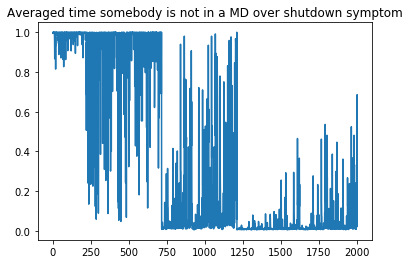

In [16]:
plt.plot(averages5)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

In [48]:
count = 0
for i in range(len(averages5)):
    if averages5[i] == 1:
        count += 1

print(count/len(averages5))

0.05344655344655345


### Six symptoms shut down

In [17]:
I = 10
parameters = np.linspace(0,13,14)
averages6 = []
paras6 = []

for i in range(len(parameters)):
    for j in range(14 - i):
        if parameters[i] != parameters[j + i]:
            for k in range(14-i-j):
                if parameters[j+i] != parameters[k+j+i]:
                    for l in range(14-k-j-i):
                        if parameters[k+j+i] != parameters[l+k+j+i]:
                            for m in range(14-l-k-j-i):
                                if parameters[l+k+j+i] != parameters[m+l+k+j+i]:
                                    for n in range(14-m-l-k-j-i):
                                        if parameters[m+l+k+j+i] != parameters[n+m+l+k+j+i]:
                                            time_not_MD = []
                                            for o in range(I):
                                                B = make_b_notrandom([int(parameters[i]),int(parameters[j + i]), int(parameters[k+i+j]), int(parameters[l+k+j+i]), int(parameters[m+l+k+j+i]), int(parameters[n+m+l+k+j+i])])
                                                time_not_MD.append(sim(B))

                                            averages6.append(np.mean(time_not_MD) / 1000)
                                            paras6.append([parameters[i], parameters[j+i],parameters[k+i+j], parameters[l+k+j+i], parameters[m+l+k+j+i], parameters[n+m+l+k+j+i]])

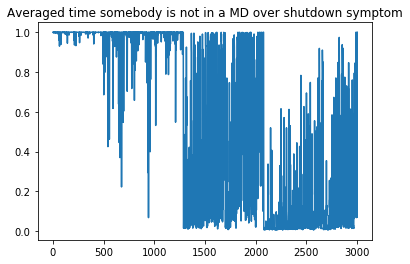

In [18]:
plt.plot(averages6)
plt.title("Averaged time somebody is not in a MD over shutdown symptom")
plt.show()

In [50]:
count = 0
for i in range(len(averages6)):
    if averages6[i] == 1:
        count += 1

print(count / len(averages6))

0.17915417915417917
